In [2]:
%load_ext autoreload
%autoreload 2

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import date
from datetime import datetime
import os

import data as data_
# import shared

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Paths

folderPath_rsrc = '/Resources/'
folderPath_results = '/Results/'
cwd = os.getcwd()
path_rsrc = cwd + folderPath_rsrc
path_results = cwd + folderPath_results
# read data
ETFs = pd.read_excel(path_rsrc + "ETFs list.xlsx")

In [4]:
ETFs

,Technology,Energy,Telecom,Consumer Discretionary,Real Estate,Industrials,Utilities,Materials,Healthcare,Consumer Staples,Financials
0,AAPB,ACES,FCOM,AMZD,BBRE,AIRR,BLLD,ALUM,AGNG,CHIS,BDCX
1,AAPD,AMJ,IXP,AMZU,BLDG,AQWA,CHIU,BATT,ARKG,CLIX,BDCZ
2,AAPU,AMLP,IYZ,BAD,BYRE,ARKX,ECLN,CHIM,BBC,EATV,BIZD
3,AIQ,AMNA,LTL,BEDZ,CHIR,AWAY,EMIF,CIRC,BBH,EATZ,BNKD
4,ARKK,AMND,NXTG,BETZ,DFGR,BDRY,FUTY,COPX,BBP,ECON,BNKU
...,...,...,...,...,...,...,...,...,...,...,...
163,XPND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,XSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,XSW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,XT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
sector = "Energy"
energy = ETFs[sector]
energy.dropna(inplace=True)

In [6]:
energy = energy.to_list()

In [7]:
len(energy)

86

In [8]:
energy[:10]

['ACES', 'AMJ', 'AMLP', 'AMNA', 'AMND', 'AMTR', 'AMUB', 'AMZA', 'ATMP', 'BNE']

## Handling data
---

### Download data

In [9]:
# download data

end_ = date.today()  # yyyy-mm-dd
if end_.day == 31:
    start_ = datetime(end_.year, end_.month - 1, 30)
else:
    start_ = datetime(end_.year, end_.month - 1, end_.day)

download = True
if download:
    df = data_.downloadAllTickers(tickers=energy, start=start_, end=end_, period='w', group_by='column')

In [10]:
df.head()

adjusted_close                                close                \
                     VMAT   WNDY    XES    XLE     XOP    VMAT   WNDY    XES   
date                                                                           
2023-10-20         25.303  11.94  92.98  90.26  150.11  25.303  11.94  92.98   
2023-10-23         25.330  11.90  92.02  88.80  147.92  25.330  11.90  92.02   
2023-10-24         25.490  12.16  91.65  87.55  146.75  25.490  12.16  91.65   
2023-10-25         25.225  11.93  90.18  87.39  146.52  25.225  11.93  90.18   
2023-10-26         25.020  12.00  88.22  86.71  145.84  25.020  12.00  88.22   

                           ...    open                              volume  \
              XLE     XOP  ...    VMAT   WNDY    XES    XLE     XOP   VMAT   
date                       ...                                               
2023-10-20  90.26  150.11  ...  25.303  11.87  94.86  91.64  152.39      0   
2023-10-23  88.80  147.92  ...  25.330  11.93  92.10  89.74  148.80      0   
2023-10-24  87.55  146.75  ...  25.490  12.10  92.28  89.02  148.68    100   
2023-10-25  87.39  146.52  ...  25.225  12.00  91.19  87.61  146.49      0   
2023-10-26  86.71  145.84  ...  25.020  11.93  89.35  86.59  144.61    100   

                                              
             WNDY     XES       XLE      XOP  
date                                          
2023-10-20   1400   65400  23274777  4764800  
2023-10-23    400  132800  25944070  4924900  
2023-10-24  12300   77200  22135801  4573100  
2023-10-25    400   65300  20706324  4440300  
2023-10-26    900  128700  22385166  4610200  

[5 rows x 30 columns]

In [11]:
closes_df = df.close

In [12]:
closes_df.head()

,VMAT,WNDY,XES,XLE,XOP
date,,,,,
2023-10-20,25.303,11.94,92.98,90.26,150.11
2023-10-23,25.330,11.90,92.02,88.80,147.92
2023-10-24,25.490,12.16,91.65,87.55,146.75
2023-10-25,25.225,11.93,90.18,87.39,146.52
2023-10-26,25.020,12.00,88.22,86.71,145.84


## Calcular retornos

In [13]:
returns = closes_df.pct_change()

In [14]:
returns.tail()

,VMAT,WNDY,XES,XLE,XOP
date,,,,,
2023-11-13,0.002349,-0.008065,0.008034,0.007193,0.007946
2023-11-14,0.018116,0.054472,0.022621,0.008928,0.016563
2023-11-15,0.000548,-0.002313,-0.018338,-0.001888,0.001138
2023-11-16,0.005477,-0.016229,-0.039580,-0.019504,-0.028854
2023-11-17,0.004322,0.009819,0.026988,0.020976,0.022027


In [15]:
# sort last row values
values = returns.iloc[-1].sort_values(ascending=False)
# max and min values
val_max = values.max()
val_min = values.min()

In [16]:
values

XES     0.026988
XOP     0.022027
XLE     0.020976
WNDY    0.009819
VMAT    0.004322
Name: 2023-11-17, dtype: float64

In [23]:
# round values to two decimal
test = [round(i*100,2) for i in values]
test

[2.7, 2.2, 2.1, 0.98, 0.43]

In [19]:
length = len(test)
# the idea is to shape an a X b matrix
a = int(np.sqrt(length))
b = int(np.ceil(length/a))
m_length = a * b                # matrix "length"

if m_length >= length:
    # compute how many elements need to be add to the array
    diff = abs(length - m_length)
    
    add =np.full(diff, np.nan)
    new_array = np.append(test, add)
    new_array = new_array.reshape(a, b)
    
    # add names to the plot
    names = values.index.to_list()
    add_names =np.full(diff, '---')
    new_names = np.append(names, add_names)
    new_names = new_names.reshape(a, b)

In [20]:
new_array

array([[2.7 , 2.2 , 2.1 ],
       [0.98, 0.43,  nan]])

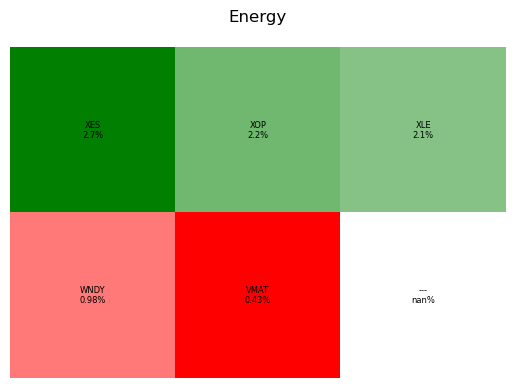

In [21]:
valores = new_array
from  matplotlib.colors import LinearSegmentedColormap
cmap_=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 

# "RdYlGn"
fig, ax = plt.subplots()

# Especificamos paleta de colores a usar y rango de valores a representar.
ax.imshow(valores, cmap=cmap_, vmin=val_min*100, vmax=val_max*100)
# borrar axis labels
ax.set_yticklabels([])
ax.set_xticklabels([])

# Reducimos la longitud de las marcas a 0 para que no sean visibles
ax.tick_params(axis=u'both', which=u'both', length=0)
for lado in ['left', 'right', 'bottom', 'top']:
    ax.spines[lado].set_visible(False)

# # Indicamos las posiciones donde dibujaremos la rejilla  
xmin,xmax = ax.get_xlim()
ymin,ymax = ax.get_ylim()

ax.set_yticks(np.arange(ymax, ymin+1), minor=True)
ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
# Dibujamos la rejilla de color blanco para que actue como separador.
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

for i in range(new_array.shape[0]):
    for j in range(new_array.shape[1]):
        # print(i, j, valores[i,j])
        text = ax.text(j, i, str(new_names[i, j]) + '\n' + str(valores[i, j])+'%',
                       ha="center", va="center", color="k", size=6)

ax.set_title(f"{sector}\n")
        
plt.savefig(f"{sector}.png")
plt.show()
